In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Z_TYPE = {
    'Ridge'  : 11.12870299,
    'Facet'  : 11.12870299,#9.96601945,
    'Valley' : 11.12870299#8.76984557
    }
paleta = {
    0 : '#93B868',
    1 : '#DDE392',
    2 : '#74795B'
    }


In [3]:
!cat VdW_dft/Energies/H1_Facet.dat

  free  energy   TOTEN  =      -155.81842570 eV
  free  energy   TOTEN  =      -155.81893146 eV
  free  energy   TOTEN  =      -155.81970229 eV
  free  energy   TOTEN  =      -155.82093485 eV
  free  energy   TOTEN  =      -155.82260773 eV
  free  energy   TOTEN  =      -155.82787440 eV
  free  energy   TOTEN  =      -155.82882171 eV
  free  energy   TOTEN  =      -155.83425293 eV
  free  energy   TOTEN  =      -155.84222265 eV
  free  energy   TOTEN  =      -155.85347397 eV
  free  energy   TOTEN  =      -155.86918851 eV
  free  energy   TOTEN  =      -155.89028968 eV
  free  energy   TOTEN  =      -155.91651790 eV
  free  energy   TOTEN  =      -155.94744121 eV
  free  energy   TOTEN  =      -155.98012026 eV
  free  energy   TOTEN  =      -156.00239842 eV
  free  energy   TOTEN  =      -155.98941468 eV
  free  energy   TOTEN  =      -155.88915559 eV
  free  energy   TOTEN  =      -155.59620559 eV
  free  energy   TOTEN  =      -154.77220735 eV
  free  energy   TOTEN  =      -151.4056

In [4]:
DFT = {}
Z = {}
d_vdw = {}
files = ['H1_Facet.dat', 'H1_Ridge.dat', 'H1_Valley.dat', 'H2_Facet.dat', 'H2_Ridge.dat', 'H2_Valley.dat', 'H3_Facet.dat', 'H3_Ridge.dat', 'H3_Valley.dat']
H1 = ['H1_Facet.dat', 'H1_Ridge.dat', 'H1_Valley.dat']
H2 = ['H2_Facet.dat', 'H2_Ridge.dat', 'H2_Valley.dat']
H3 = ['H3_Facet.dat', 'H3_Ridge.dat', 'H3_Valley.dat']

# Leer y almacenar en los diccionarios DFT y Z
for file in files:
    # Leer datos de energía desde el archivo correspondiente en la carpeta 'VdW_dft/Energies/'
    df_DFT = pd.read_csv(f'VdW_dft/Energies/{file}', delim_whitespace=True, header=None, usecols=[4], names=['E_DFT'])
    DFT[file] = df_DFT
    DFT[file]['E_DFT'] += 155.82150402
    # Leer datos de Z desde el archivo correspondiente en la carpeta 'VdW_dft/Z/'
    df_Z = pd.read_csv(f'VdW_dft/Z/{file}', delim_whitespace=True, header=None, usecols=[0], names=['Z'])
    Z[file] = df_Z
    Z[file] -= 11.12870299
    # Combinar las series E_DFT y Z en un solo DataFrame
    d_vdw[file] = pd.concat([ Z[file].reset_index(drop=True),DFT[file].reset_index(drop=True)], axis=1)



In [5]:
X_Valley = 0.00002
X_Facet_1 = 1.991
X_Ridge = 4.02
X_Facet_2 = 6.048 

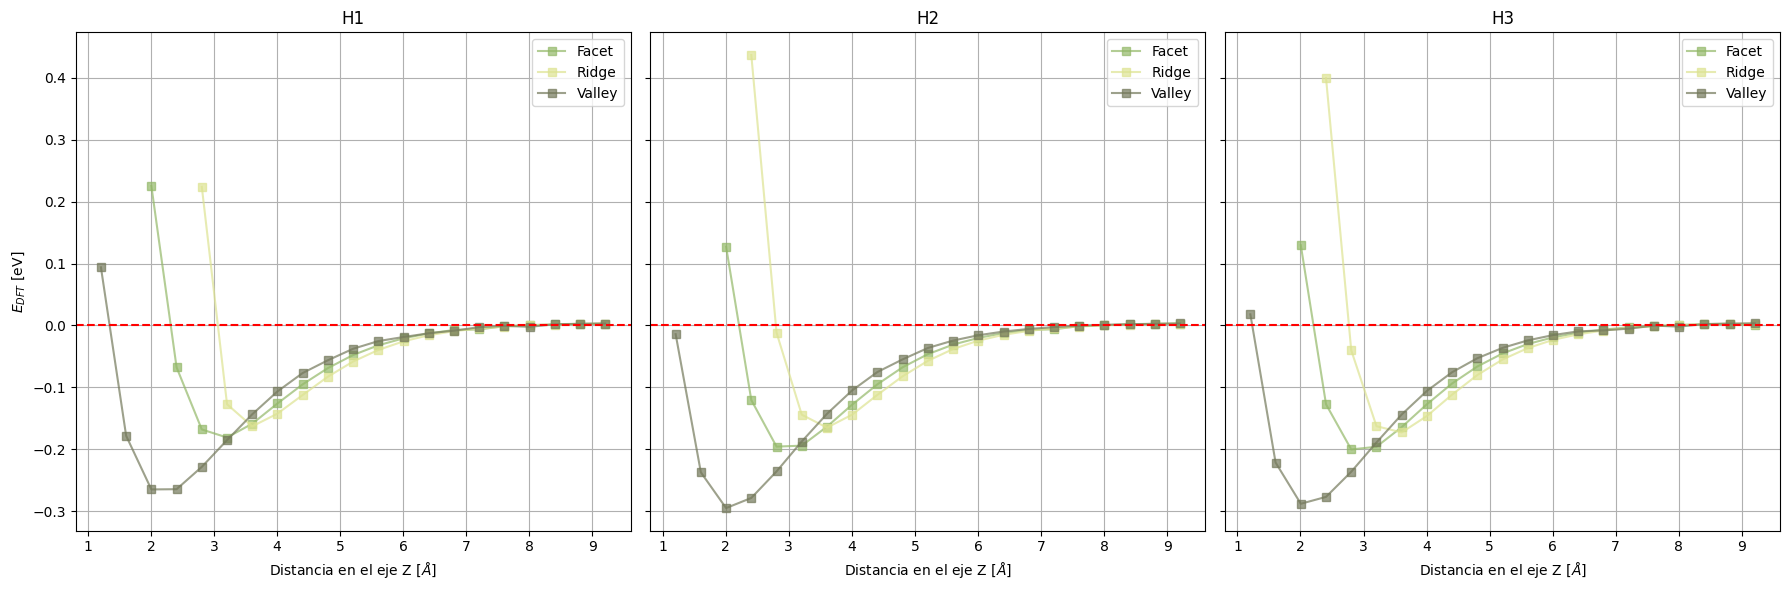

In [6]:
fig,ax = plt.subplots(1,3, figsize=(18,6), sharex=True,sharey=True)
for i,file in enumerate(H1):
    (d_vdw[file]
     .query('E_DFT < 0.5')
     .plot( 
            x='Z',
            y='E_DFT', 
            label=(file.split('.')[0]).split('_')[1], 
            color=paleta[i],
            marker='s',
            alpha=0.7,
            ax=ax[0]

        )
     )
    
for i,file in enumerate(H2):
    (d_vdw[file]
     .query('E_DFT < 0.5')
     .plot( 
            x='Z',
            y='E_DFT', 
            label=(file.split('.')[0]).split('_')[1], 
            color=paleta[i],
            marker='s',
            alpha=0.7,
            ax=ax[1]

        )
     )
    
for i,file in enumerate(H3):
    (d_vdw[file]
     .query('E_DFT < 0.5')
     .plot( 
            x='Z',
            y='E_DFT', 
            label=(file.split('.')[0]).split('_')[1], 
            color=paleta[i],
            marker='s',
            alpha=0.7,
            ax=ax[2]

        )
     )
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_xlabel(f'Distancia en el eje Z [$\AA$]')
ax[1].set_xlabel(f'Distancia en el eje Z [$\AA$]')
ax[2].set_xlabel(f'Distancia en el eje Z [$\AA$]')
ax[0].set_ylabel('$E_{DFT}$ [eV]')

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].set_title('H1')
ax[1].set_title('H2')
ax[2].set_title('H3')
fig.tight_layout()

In [16]:
d_vdw['H1_Ridge.dat']

,Z,E_DFT
0,9.205377,0.002923
1,8.805377,0.002396
2,8.405377,0.001439
3,8.005377,0.000240
4,7.605377,-0.001742
5,7.205377,-0.004722
6,6.805377,-0.009152
7,6.405377,-0.015772
8,6.005377,-0.025539
9,5.605377,-0.039457


In [17]:
d_vdw['H2_Valley.dat']

,Z,E_DFT
0,9.205377,0.003256
1,8.805377,0.002737
2,8.405377,0.002064
3,8.005377,0.000991
4,7.605377,-0.000495
5,7.205377,-0.002648
6,6.805377,-0.005584
7,6.405377,-0.009754
8,6.005377,-0.015807
9,5.605377,-0.024320
